In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-patent-phrase-to-phrase-matching/sample_submission.csv
/kaggle/input/us-patent-phrase-to-phrase-matching/train.csv
/kaggle/input/us-patent-phrase-to-phrase-matching/test.csv


权重 1.79321637: 偏置 = 3.23
Iteration 0: Loss = 5.87617207287336
Iteration 50: Loss = 1.0644535035017373
Iteration 100: Loss = 0.9936170720470175
Iteration 150: Loss = 0.9925421328732298
Iteration 200: Loss = 0.992502575297555
Iteration 250: Loss = 0.9924847942267274
Iteration 300: Loss = 0.9924720737506094
Iteration 350: Loss = 0.9924628614980634
Iteration 400: Loss = 0.9924561882541858
Iteration 450: Loss = 0.9924513542127806
Learned parameters: w = 2.9634485468677436, b = 4.227807331612966


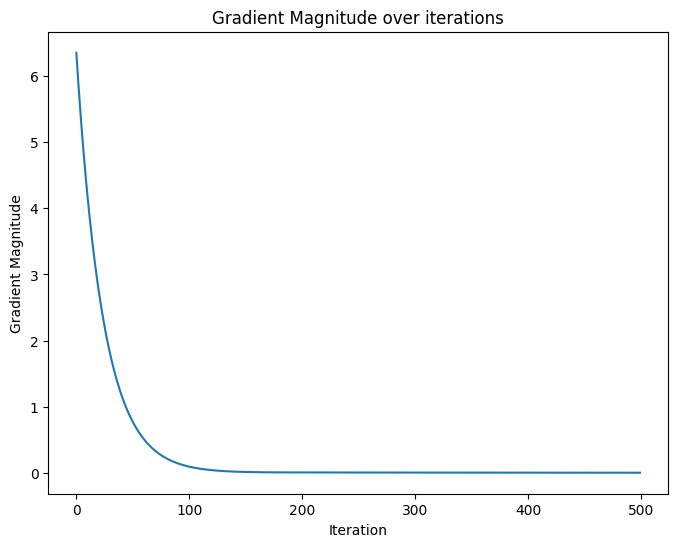

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# 记录梯度大小
grad_magnitudes = []
# 生成示例数据
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# 初始化参数
w = 1.79321637
b = 3.23
print(f"权重 {w}: 偏置 = {b}")

# 学习率和迭代次数
learning_rate = 0.01
iterations = 500

# 梯度下降法
for i in range(iterations):
    # 预测值和实际值之间的差异
    y_pred = w * X + b
    error = y_pred - y
    
    # 计算损失函数（均方误差）
    loss = (error**2).mean()
    
    # 计算损失函数的梯度
    w_grad = 2 * (error * X).mean()
    b_grad = 2 * error.mean()
     # 计算梯度大小并记录
    grad_magnitude = np.sqrt(w_grad**2 + b_grad**2)
    grad_magnitudes.append(grad_magnitude)
    # 更新参数
    w -= learning_rate * w_grad
    b -= learning_rate * b_grad
    
    # 打印损失
    if i % 50 == 0:
        print(f"Iteration {i}: Loss = {loss}")

# 最终模型参数
print(f"Learned parameters: w = {w}, b = {b}")
# 绘制梯度大小随迭代次数变化的图
plt.figure(figsize=(8, 6))
plt.plot(grad_magnitudes)
plt.title('Gradient Magnitude over iterations')
plt.xlabel('Iteration')
plt.ylabel('Gradient Magnitude')
plt.show()

在机器学习中，一个常见且基础的算法是线性回归。线性回归试图找到输入变量（或特征）和输出变量之间的线性关系。它的潜变量模型、目标函数（损失函数）以及目标函数的梯度计算在很多机器学习的场景中都有广泛应用。以下是一个简单的线性回归示例，以及相关概念的解释和代码实现。

### 1. 线性回归的概念：
- **潜变量模型**：在线性回归中，潜变量是模型尝试学习的系数，它们定义了输入特征和预测输出之间的线性关系。模型通常表示为 \( y = wx + b \)，其中 \( y \) 是预测值，\( x \) 是输入特征，\( w \) 是权重，\( b \) 是偏置。
- **目标函数（损失函数）**：一个常用的目标函数是均方误差（MSE），它计算模型预测和实际数据之间差的平方的平均值。它的形式通常是 \( \frac{1}{n}\sum_{i=1}^{n}(y_i - (wx_i + b))^2 \)。
- **目标函数的梯度**：梯度是损失函数相对于其参数的偏导数。对于线性回归，我们需要计算损失函数相对于权重 \( w \) 和偏置 \( b \) 的偏导数。

### 2. 线性回归的Python代码示例：
以下是一个使用Python实现的简单线性回归模型。这个示例包括数据的生成、模型的定义、损失函数的计算，以及使用梯度下降法更新参数。

```python
import numpy as np

# 生成示例数据
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 初始化参数
w = np.random.randn(1)
b = np.random.randn(1)

# 学习率和迭代次数
learning_rate = 0.01
iterations = 1000

# 梯度下降法
for i in range(iterations):
    # 预测值和实际值之间的差异
    y_pred = w * X + b
    error = y_pred - y
    
    # 计算损失函数（均方误差）
    loss = (error**2).mean()
    
    # 计算损失函数的梯度
    w_grad = 2 * (error * X).mean()
    b_grad = 2 * error.mean()
    
    # 更新参数
    w -= learning_rate * w_grad
    b -= learning_rate * b_grad
    
    # 打印损失
    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {loss}")

# 最终模型参数
print(f"Learned parameters: w = {w}, b = {b}")
```

在这个例子中：
- **潜变量模型** 是由 \( w \) 和 \( b \) 定义的线性关系 \( y = wx + b \)。
- **目标函数** 是均方误差 \( \frac{1}{n}\sum_{i=1}^{n}(y_i - (wx_i + b))^2 \)。
- **目标函数的梯度** 是通过对 \( w \) 和 \( b \) 计算偏导数得到的，然后用这些梯度来更新 \( w \) 和 \( b \) 以减小损失。

### 注意：
这个代码是一个非常简化的示例，旨在展示线性回归的基本概念。在实际应用中，可能需要更复杂的数据预处理、模型验证、调参等步骤。此外，对于大型或复杂的数据集，通常会使用专门的库，如scikit-learn或TensorFlow，来实现线性回归和其他机器学习算法。

希望这个例子和解释有助于你更好地理解潜变量模型、目标函数和目标函数梯度的概念及其在实际中的应用！

线性回归和线性代数之间有着紧密的关系，而线性代数、高等数学和微积分等都是理解和应用机器学习算法的重要数学基础。下面我会一步一步解释它们之间的关系，以及为什么这些数学知识对成为机器学习工程师是重要的。


当你在训练机器学习模型时，训练的迭代次数、初始参数设置、以及学习率等因素都会影响最终模型的性能和参数的准确性。这里你提到，在设置更少的迭代次数和不同的初始参数后，最终学到的参数与在1000次迭代下学到的参数相比，并不那么精确。这种现象可以从几个方面来解释：

### 1. 迭代次数（Iterations）：
- **足够的迭代**：对于梯度下降法，如果迭代次数不够，模型可能还没来得及收敛到最佳参数就停止了训练。这意味着模型还没有充分利用数据来调整其参数。
- **早停**：在有限的迭代次数内，尤其是如果初始参数距离最佳解较远时，模型可能只是接近最优解，但还没有达到或者稳定在那个点。

### 2. 初始参数（Initial Parameters）：
- **参数的起点**：初始参数决定了梯度下降开始的位置。如果开始时离最优解很远，那么即使是正确的下降方向，也可能需要更多的迭代才能到达最低点。
- **局部最小值**：尽管线性回归的损失函数通常是凸形的（只有一个全局最小值），在更复杂的模型中，不同的初始参数可能导致模型陷入不同的局部最小值，这些局部最小值的性能可能不如全局最小值。

### 3. 学习率（Learning Rate）：
- **步长决定速度**：学习率决定了模型在梯度方向上每一步的前进距离。如果学习率设置得太小，模型需要更多的迭代才能收敛。相反，如果学习率太大，模型可能会在最小值附近震荡，甚至越过最小值。
- **最佳学习率**：选择一个合适的学习率可以帮助模型更快地收敛，并且在有限的迭代次数内达到更好的结果。

当你观察到在大约100次迭代之后，损失函数的减少变得非常缓慢，这表明模型可能已经接近了其最优解，或者说已经接近了损失函数的最小值。这个现象是机器学习中非常常见的，特别是在使用梯度下降法进行优化时。让我们来深入分析这一过程，并了解为什么会出现这种情况。

1. 梯度下降和学习率：
梯度下降法 是一种迭代算法，它通过计算损失函数的梯度来更新模型参数，以期减小损失。在每次迭代中，你沿着损失函数下降最快的方向（梯度的反方向）更新参数。
学习率 决定了你在梯度方向上前进的步长。如果学习率太大，你可能会越过最小值；如果太小，则优化过程会非常缓慢。
2. 接近最优解时的行为：
当你开始训练时，参数可能距离最优解还很远，因此每次迭代可以显著减少损失。
但当你接近最优解时，梯度会变得越来越小，因为损失函数在最小值附近的斜率降低了。这意味着参数的更新量会变得非常小，损失的减少也会变得非常缓慢。
3. 为什么是100次迭代？
初始化的影响：参数的初始值可能恰好使模型开始时就较接近最优解，因此只需要较少的迭代就能接近最小损失。
数据和模型的复杂度：简单的模型和/或数据可能意味着损失函数的表面（landscape）比较平滑，模型可以更快地找到最小值。
学习率的设置：选择的学习率可能允许在不发生过度摆动的情况下快速收敛。

### 结论：
在你的情况下，140次迭代可能不足以让模型从初始参数 \( w = 3.79321637, b = 3.23 \) 收敛到最佳参数。此外，如果初始参数距离最优解更远，那么在相同的迭代次数内，模型可能只能达到一个相对较差的解。通常，你可以通过实验来确定所需的迭代次数、学习率和初始参数，以便模型能够有效地学习并收敛到最佳参数。

如果你想要更精确地了解为什么特定的设置产生了这样的结果，你可能需要进一步分析模型在整个训练过程中的行为，包括损失变化、参数更新速度等。希望这些解释有助于你更好地理解训练过程中的这些现象！

损失函数在机器学习中扮演着至关重要的角色，因为它们衡量了模型的预测值和实际值之间的差异。不同类型的机器学习任务和算法通常会使用不同的损失函数。下面我会介绍几种不同场景下常用的损失函数，并解释它们的应用和特点。

### 1. 线性回归 - 均方误差（MSE）：
- **场景**：线性回归是用来预测连续值的，如房价、温度等。
- **损失函数**：均方误差（MSE）是最常用的损失函数，计算模型预测值和实际值之间差值的平方的平均值。公式为 \( \text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \)，其中 \( y_i \) 是真实值，\( \hat{y}_i \) 是预测值。
- **特点**：MSE 惩罚大误差比小误差更多，因此它倾向于避免大的预测误差。

### 2. 逻辑回归 - 对数损失（Log Loss）：
- **场景**：逻辑回归用于二分类问题，预测一个实例属于某个类别的概率。
- **损失函数**：对数损失（Log Loss），也称为交叉熵损失，衡量的是模型输出的概率分布与真实标签的分布之间的差异。公式为 \( \text{Log Loss} = -\frac{1}{n}\sum_{i=1}^{n}[y_i\log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i)] \)，其中 \( y_i \) 是实际类别，\( \hat{y}_i \) 是预测概率。
- **特点**：对数损失惩罚远离真实类别的预测。当预测概率接近0或1时，如果预测错误，损失会非常大。

### 3. 支持向量机（SVM） - Hinge Loss：
- **场景**：SVM是一种用于分类的算法，特别是在边界清晰时效果很好。
- **损失函数**：Hinge Loss 是SVM的标准损失函数，旨在找到可以正确分类所有训练数据的最大边界。公式为 \( \text{Hinge Loss} = \sum_{i=1}^{n} \max(0, 1 - y_i(\vec{w} \cdot \vec{x}_i + b)) \)，其中 \( y_i \) 是实际类别，\( \vec{w} \cdot \vec{x}_i + b \) 是模型的预测。
- **特点**：Hinge Loss 不仅惩罚被错误分类的点，还惩罚那些虽然分类正确但离分类边界太近的点。

### 4. 神经网络 - 交叉熵损失（Cross-Entropy Loss）：
- **场景**：神经网络可用于各种任务，包括分类、回归等。
- **损失函数**：在多类分类问题中，通常使用交叉熵损失。对于二分类问题，它类似于逻辑回归中的对数损失。在多分类问题中，它计算的是模型输出的概率分布与真实标签分布之间的差异。
- **特点**：交叉熵损失能够直接衡量模型输出概率分布与真实分布的差异，非常适合概率输出的模型。

### 总结：
不同的机器学习任务和模型会根据其特点和需求选择合适的损失函数。损失函数的选择对模型的学习和性能有着直接的影响。选择合适的损失函数可以帮助模型更有效地学习，更准确地预测。希望这些例子和解释有助于你理解不同场景下损失函数的选择和作用！


### 线性回归与线性代数的关系：

1. **基本概念**：
   - **线性回归**：线性回归是一种预测模型，用于在给定自变量的情况下预测因变量的值。当我们有多个自变量时，这个模型被称为多元线性回归。
   - **线性代数**：线性代数是数学的一个分支，它研究向量空间和线性映射。它包括研究方程组、向量、矩阵、线性变换等概念。

2. **关系**：
   - 在线性回归中，尤其是多元线性回归，我们常常用矩阵和向量来表示数据集。这里的每个数据点（或观测值）可以被视为高维空间中的一个点，而线性回归模型就是试图找到一个最佳的超平面来近似所有这些点。
   - 例如，参数估计中常用的最小二乘法，在多变量情况下，可以通过矩阵运算来高效地实现。这些矩阵运算包括逆矩阵、转置、矩阵乘法等，都是线性代数的基本概念。

### 为什么需要数学知识：

1. **理解模型**：
   - 线性代数提供了一种表达和解决问题的语言和工具，它能帮助你更深入地理解模型的工作原理。比如，理解矩阵分解如何在PCA（主成分分析）中工作，或者理解向量空间如何帮助我们在SVM（支持向量机）中找到最佳决策边界。

2. **算法实现**：
   - 在实现算法时，尤其是在大数据集上，有效的数学知识能帮助你写出更高效、更可靠的代码。例如，利用线性代数知识，你可以更好地理解和实现各种矩阵分解技术，这在机器学习中是常见的操作。

3. **高等数学和微积分**：
   - 微积分（特别是对于多变量函数的偏导数）是理解如何训练模型的核心。梯度下降法，这是机器学习中最常用的优化技术之一，它的本质就是微积分中的导数概念。
   - 高等数学中的许多概念，如概率论，对于理解和实现机器学习算法也是至关重要的。例如，理解随机变量、期望值、方差等概念对于理解和实现概率模型是必要的。

### 成为机器学习工程师：

- 当然，即使没有深入的数学背景，仍然可以使用现有的库和工具来构建和应用机器学习模型。许多库提供了抽象层，使得用户可以不必深入了解背后的数学就能训练模型。
- 然而，拥有坚实的数学基础将使你能够更深入地理解模型的工作原理，更有效地解决问题，甚至在必要时修改模型或算法以适应特定的需求。对于进行研究或开发新方法的工程师来说，这一点尤其重要。

### 总结：
线性代数、微积分和高等数学为理解和实施机器学习算法提供了基础。虽然你可以在没有这些深入知识的情况下开始你的机器学习之旅，但如果你想要更深入地理解这些算法，或者成为这一领域的专家，那么这些数学知识将是不可或缺的。随着你在这一领域的深入，逐渐建立起这些数学基础将极大地扩展你的能力和视野。希望这个解释对你有所帮助！如果你有任何疑问或需要更多信息，请随时告诉我。

Epoch 1/5
1500/1500 [==============================] - 22s 14ms/step - loss: 0.1751 - accuracy: 0.9485 - val_loss: 0.0745 - val_accuracy: 0.9777
Epoch 2/5
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0577 - accuracy: 0.9826 - val_loss: 0.0644 - val_accuracy: 0.9808
Epoch 3/5
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0513 - val_accuracy: 0.9852
Epoch 4/5
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0544 - val_accuracy: 0.9848
Epoch 5/5
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0579 - val_accuracy: 0.9855
313/313 - 1s - loss: 0.0505 - accuracy: 0.9853 - 1s/epoch - 4ms/step

Test accuracy: 0.9853000044822693


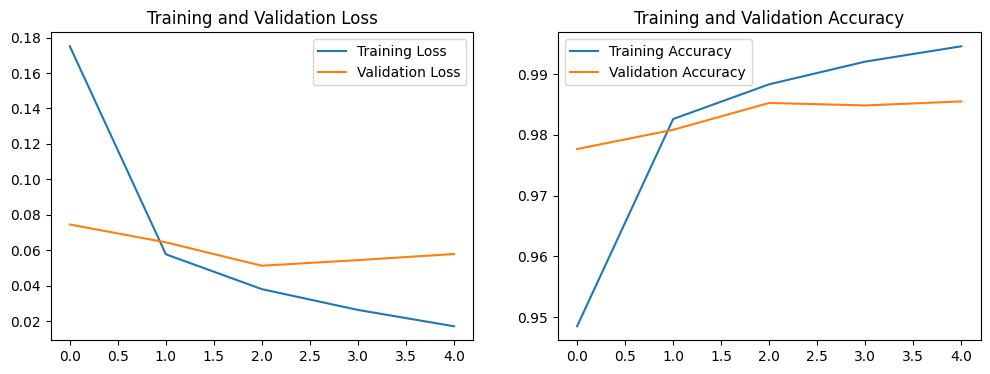

In [22]:
import tensorflow as tf

# 加载数据
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数据标准化
x_train, x_test = x_train / 255.0, x_test / 255.0

# 数据预处理 - 添加一个通道维度
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
# 定义模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
# 选择学习率
learning_rate = 0.001

# 编译模型，选择Adam优化器和学习率
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# 训练模型
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

import matplotlib.pyplot as plt

# 绘制训练过程中的损失和准确率
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()



Epoch 1/5
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1648 - accuracy: 0.9511 - val_loss: 0.0798 - val_accuracy: 0.9770
Epoch 2/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0566 - accuracy: 0.9825 - val_loss: 0.0584 - val_accuracy: 0.9833
Epoch 3/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0338 - accuracy: 0.9898 - val_loss: 0.0521 - val_accuracy: 0.9837
Epoch 4/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0204 - accuracy: 0.9939 - val_loss: 0.0511 - val_accuracy: 0.9855
Epoch 5/5
313/313 [==============================] - 1s 4ms/step
Confusion Matrix
 [[ 973    1    1    0    0    0    4    0    0    1]
 [   0 1132    1    0    0    0    2    0    0    0]
 [   2    2 1016    1    1    0    1    7    2    0]
 [   0    0    3  993    0    8    0    1    3    2]
 [   2    0    1    0  968    0    6    0    0    5]
 [   1    0    1    2    0  877    9    0    1    1]
 [   4    2    0   

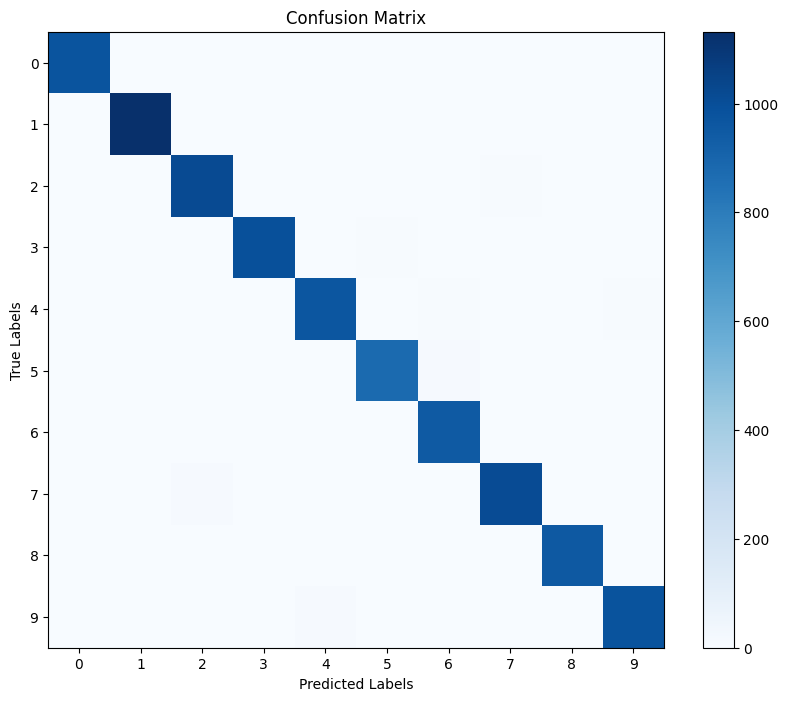

In [23]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 加载和预处理数据
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# 定义模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# 编译模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 训练模型
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# 预测测试数据
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# 性能评估 - 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix\n', conf_matrix)

# 性能评估 - 更详细的报告
print('\nClassification Report')
print(classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(10)]))

# 绘制混淆矩阵
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(10), np.arange(10))
plt.yticks(np.arange(10), np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


这些输出提供了关于模型在MNIST手写数字识别任务上的详细性能分析。让我们一步一步地分析这些结果：

### 混淆矩阵（Confusion Matrix）：
混淆矩阵是一个表格，用于描述分类模型的性能，特别是每个类别被正确和错误分类的情况。

- **行**：表示实际的类别（实际的手写数字）。
- **列**：表示模型预测的类别。
- **对角线上的值**：表示正确分类的数量。例如，第一行第一列的973表示有973个实际为数字0的图像被正确分类为数字0。
- **非对角线上的值**：表示误分类的数量。例如，第一行第七列的4表示有4个实际为数字0的图像被错误分类为数字6。

### 分类报告（Classification Report）：
分类报告为每个类别提供了以下几个关键性能指标：

- **precision**：也称为正确率，表示为该类别预测正确的样本占预测为该类别的样本的比例。例如，对于数字0，precision为0.98，表示模型预测为数字0的图像中，有98%是正确的。
- **recall**：也称为召回率，表示为该类别预测正确的样本占实际为该类别的样本的比例。例如，对于数字0，recall为0.99，表示实际为数字0的图像中，有99%被模型正确识别。
- **f1-score**：是precision和recall的调和平均，是一个综合考虑二者的性能指标。F1分数越高，表示模型的性能越好。
- **support**：表示数据集中每个类别的实际出现次数。例如，数字0在测试集中出现了980次。

### 总体性能：
- **accuracy**：表示整个测试集上，被正确分类的图像占总图像的比例。这里模型的准确率为0.99，非常高。
- **macro avg**：计算每个类别的指标后取平均，未考虑每个类别的样本数。
- **weighted avg**：计算每个类别的指标后取平均，但考虑了每个类别的样本数。

### 分析总结：
- 混淆矩阵显示了模型在某些类别上可能存在的特定问题。例如，一些0被误分类为1或6，这可能是因为某些0的写法与1或6相似。
- 性能报告显示模型在所有类别上都有很高的precision和recall，说明模型的整体性能非常好。
- 总体准确率为0.99，表明模型在这个任务上非常有效。

通过这样全面的评估，你可以更准确地了解模型的性能，识别潜在的问题，以及找到可能的改进方向。希望这个分析对你有所帮助！如果你有任何疑问或需要更多的解释，请随时告诉我。

在工业界，除了传统的性能评估之外，还常常需要实施其他类型的测试，如A/B测试、持续性能监控、抗噪声能力测试等。这些测试通常涉及更复杂的实施策略和系统设计。下面我将为你介绍这些测试的概念，并给出相应的代码示例或实施建议。

### 1. A/B测试
A/B测试是一种非常流行的在线实验方法，用于测试新功能或模型的效果。

#### 实施步骤：
1. **定义目标**：明确你想通过A/B测试来改进或验证的指标，例如提高点击率、用户留存率等。
2. **用户分组**：将用户随机分为两组，一组使用旧模型（A组），另一组使用新模型（B组）。
3. **收集数据**：在一段时间内收集两组用户的数据。
4. **统计检验**：使用统计方法来分析两组数据的差异是否显著，以决定哪个模型更优。

#### 代码示例：
A/B测试通常涉及实时用户流量和在线系统，不易通过简单的代码实现。以下是一个统计检验的示例，假设你已经有了两组数据。
```python
from scipy import stats

# 假设data_A和data_B分别是A组和B组的转化率
data_A = [0.1, 0.11, 0.09, 0.12, 0.1]
data_B = [0.13, 0.14, 0.15, 0.13, 0.14]

# 进行t检验
t_stat, p_val = stats.ttest_ind(data_A, data_B)

print("t-statistic:", t_stat)
print("p-value:", p_val)
```

### 2. 持续性能监控
持续性能监控是确保模型长期稳定运行的关键。

#### 实施步骤：
1. **日志记录**：确保所有请求和响应都被记录下来。
2. **性能指标**：定义关键性能指标（KPIs），如延迟、吞吐量和准确率。
3. **警报系统**：建立一个系统，当性能指标低于某个阈值时，能够发送警报。
4. **定期评估**：定期使用新收集的数据来评估模型的性能。

#### 代码示例：
持续性能监控通常涉及日志系统和监控系统，以下是伪代码示例：
```python
# 伪代码示例，需要结合实际的监控系统实现
def monitor_performance(logs):
    latency = calculate_latency(logs)
    throughput = calculate_throughput(logs)
    accuracy = calculate_accuracy(logs)

    if latency > latency_threshold:
        send_alert("High latency detected.")
    if throughput < throughput_threshold:
        send_alert("Low throughput detected.")
    if accuracy < accuracy_threshold:
        send_alert("Accuracy drop detected.")
```

### 3. 抗噪声能力测试
测试模型对输入噪声的鲁棒性。

#### 实施步骤：
1. **噪声数据生成**：在原始测试数据上添加噪声，如高斯噪声、盐和胡椒噪声等。
2. **性能评估**：使用含噪声的数据来评估模型，观察性能变化。
3. **对比分析**：将含噪声数据的性能与原始数据的性能进行对比，评估模型的鲁棒性。

#### 代码示例：
以下是在图像数据上添加噪声并评估模型的示例。
```python
import numpy as np

# 假设x_test是原始的图像数据，model是已训练好的模型

# 向数据添加高斯噪声
noise_factor = 0.5
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_test_noisy = np.clip(x_test_noisy, 0., 1.)  # 限制数据在合理范围内

# 使用含噪声的数据评估模型
noisy_loss, noisy_accuracy = model.evaluate(x_test_noisy, y_test, verbose=2)
print("Noisy data - Loss:", noisy_loss, "Accuracy:", noisy_accuracy)
```

### 其他考虑：
除了以上提到的测试，还可能需要进行的测试和考虑包括：
- **模型解释性**：确保你能解释模型的预测，特别是在对结果负责任的领域。
- **对抗样本测试**：检查模型对故意制造的对抗样本的反应。
- **多样性和包容性测试**：确保模型在不同群体上表现公平，没有歧视性偏

差。

实施这些测试需要一个综合的系统和策略，通常涉及数据管道、监控系统、自动化测试框架等。在实际应用中，这些系统可能会变得非常复杂，需要跨团队的协作和持续的维护。希望这些示例和说明能帮助你更好地理解如何在实际中实施这些测试。如果你有任何疑问或需要更多信息，请随时告诉我。